# Kmeans Clustering with python

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### Import DataSet

In [2]:
# read data as dataframe

df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### check DataSet for Null value

In [3]:
# check the summary of data, check null values
#df.info()

# drop columns with totally null values
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

# Check for remaining '?' or 'inf' values
df.replace('?', np.nan, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


### Convert dataframe to a numeric dataframe

In [4]:
# Drop status_id and status_published features, they are non-numerical
df = df.drop(['status_id', 'status_published'], axis=1)

# check different status_type and count them 
print('status_type= ',df['status_type'].unique())
len(df['status_type'].unique())


status_type=  ['video' 'photo' 'link' 'status']


4

## Data Pre-processing
### 1. Label Encoding
- use label encoder to convert object datatype to integer




In [5]:
'''
status_type=  ['video' 'photo' 'link' 'status']
ecnoded status type = [3,1,0,2]
'''
# Initialize Encoder
label_encoder = LabelEncoder()

# Fit encoder on 'status_type' feature
df['status_type'] = label_encoder.fit_transform(df['status_type'])

df.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


### 2. Feature Scaling 
- feature Scaling with  **StandardScaler()**   and   **MinMaxScaler()**   and compare Kmeans inertia based on feature scaling method
- reshape(-1,1) convert 1D array to 2D array. usage: concatenate method
- drop categorical features and save them from Scaling
- concatenate numerical and categorical features together
- Combine numerical features and categorical feature together

In [6]:
# select categorical feature
# Convert it to 2D array. 
categorical_feature = df['status_type'].values.reshape(-1,1)

# extract columns from dataframe
col = df.columns

# drop categorical feature
numerical_df= df.drop(['status_type'], axis=1)


# Initialize Standard scaler
scale = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit on features
scaled_arr = scale.fit_transform(numerical_df)
minmax_arr = minmax_scaler.fit_transform(numerical_df)

# Concatenate categorical feature with  scaled data with StandardScaler
scaled_df = pd.DataFrame(np.concatenate((scaled_arr, categorical_feature), axis=1), columns=list(numerical_df) + ['status_type'])

# Concatenate categorical feature with  scaled data with MinMaxScaler
minmax_scaled_df = pd.DataFrame(np.concatenate((minmax_arr, categorical_feature), axis=1), columns=list(numerical_df) + ['status_type'])

# check scaled dataframe
scaled_df.tail()
minmax_scaled_df.tail()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.0,0.000000,0.0,0.0,1.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.0,0.006369,0.0,0.0,1.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.0,0.000000,0.0,0.0,1.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.0,0.000000,0.0,0.0,1.0
7049,0.003609,0.000000,0.000000,0.003609,0.000000,0.0,0.000000,0.0,0.0,1.0


## Kmeans CLustering


### KMeans description:
The KMeans algorithm is a popular clustering method in machine learning used to partition a dataset into a set number of clusters.


### Kmeans tune up:
   1. **n_clusters = 2**      --> number of clusters to form, or number of centroids . default = 8
   2. **init = 'k-means++'**  --> initial position of the cluster centroids --> 'k-means++' use smart initialization technique / other option is 'random'. default = 'k-means++'
   3. **max_iter = 300**       --> Controls the maximum number of updates that can be made to the centroids. default = 300
   4. **random_state**       --> This parameter is important for reproducibility. default = 'None'
   5. **n_init = 12**        --> The number of times the algorithm will be run with different centroid seeds. default = 10
   6. **algorithm**          --> The K-Means algorithm to use. /options = 'lloyd' that is more general and for all situations and 'elkan' is optimized version and faster. 

#### I have Changed the value of n_clusters based on the result of Elbow Method that is described in next cell


In [7]:
# Initialize Kmeans
n_clusters = 2
Kmeans = KMeans(init = 'k-means++',n_clusters=n_clusters, n_init = 12, max_iter=300, algorithm='lloyd', random_state=43)

# Fit the model on dataset
Kmeans.fit(minmax_scaled_df)

# label of each point
labels = Kmeans.predict(minmax_scaled_df)
labels 

# centroids coordinate
centroids = Kmeans.cluster_centers_
#print(f'Centroids coordinate= \n{centroids}')

minmax_scaled_df['cluster_km'] = labels

# Convert dataframe to array
X = minmax_scaled_df.values


Kmeans.inertia_



573.514527609583

## Evaluation
- use **Elbow method** or **Silhoutte Analysis** to find the best value of   *number of clusters* 
- **Inertia** is the measure of how well the KMeans algorithm has clustered the data.
- **Lower Inertia**,  indicates that the data points are closer to their respective centroids  --> Better Clustering
    * Note: lower inertia alone is not always indicative of better clustering, as inertia will naturally decrease as the number of clusters increases.
        * **So** Use it with other metric methods to find the best value of k.  --> Other metric = **Elbow Method**
- 

### Elbow Method

#### Elbow Method Overview
The Elbow Method is a technique used to determine the optimal number of clusters in KMeans clustering. It involves plotting the sum of squared distances (inertia) between data points and their nearest cluster centroid against the number of clusters. The "elbow" point on the graph, where the rate of decrease in inertia sharply slows, suggests the optimal number of clusters, balancing compactness and simplicity.

#### Result Consideration
* As we can see, number of cluster equals 2 is elbow point. 
* This is where the rate of decrease in inertia slows down significantly, indicating that adding more clusters beyond this point results in diminishing returns in terms of reduced inertia.

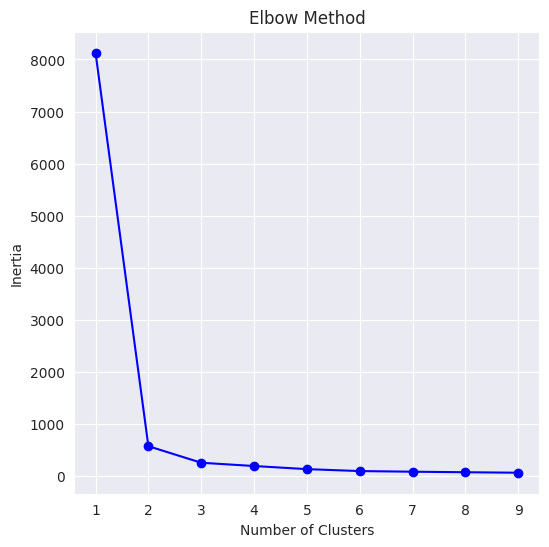

In [8]:
inertia_list=[]

K = range(1,10)

for k in K:
    Kmeans_clustering = KMeans(n_clusters = k, init= 'k-means++', n_init = 12, max_iter = 300, algorithm = 'lloyd', random_state = 42)
    Kmeans_clustering.fit(minmax_scaled_df)
    Kmeans_inertia = Kmeans_clustering.inertia_
    inertia_list.append(Kmeans_inertia)

plt.figure(figsize=((6,6)))
plt.plot(K, inertia_list, 'bo-')    

plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

### Silhouette Method

#### Silhouette Overview
* Silhouette Analysis helps evaluate how well-separated the clusters are

#### Silhouette Analysis
It computes a score for each sample, where:

   Silhouette Coefficient (s) ranges from -1 to +1
    
   1. A value close to +1 indicates that the sample is well-clustered (i.e., its cluster is distinct from others).
   
   2. A value close to 0 means the sample is on or very close to the decision boundary between two clusters.
   
   3. A value close to -1 indicates that the sample might have been assigned to the wrong cluster.

In [9]:
# Compute silhouette score for each sample
silhoutte_avg = silhouette_samples(minmax_scaled_df, labels)
print(f'Silhoutte average= {silhoutte_avg}')

# filter samples are well-clustered
well_clustered_datapoints = (silhoutte_avg >0.5).sum()
print(well_clustered_datapoints)

average_score = np.mean(silhoutte_avg)
print(f'average score = {average_score}')


Silhoutte average= [0.86120194 0.96218841 0.88968774 ... 0.96623039 0.94313913 0.96779014]
6678
average score = 0.889743743168126


## Clustering Analysis


**Cluster 0:**
* Frequent status_type in cluster0 is 'photo'
* It has lower reaction than the other cluster.
* has lower values for almost all the reactions
* It represents sellers who generally receive lower engagement across all metrics

**Cluster 1:**
*  Frequent status_type in cluster1 is 'Video'
* It has higher reaction than cluster0
* has higher values for almost all the reactions
* It represents sellers who generally receive higher engagement across all metrics

---
* encoded value of status_type :
- link => 0
- photo => 1
- status => 2
- video => 3



In [12]:
# add labels to minmax_scaled dataframe in a column
minmax_scaled_df['cluster_km'] = labels

# separate encoded categorical value and numerbical features from each other
numerical_minmax_df = minmax_scaled_df.drop(['status_type'], axis=1)

# group numerical feature of minmax scaled dataframe by 'cluster_km' and calculate the mean of each numerical feature 
print(numerical_minmax_df.groupby(['cluster_km']).mean())

# group encoded categorical feature by 'cluster_km' 
# apply mode function to 'state_type' for each cluster
status_type_mode = minmax_scaled_df.groupby(['cluster_km'])['status_type'].agg(pd.Series.mode)
print(f'\n mode of status_type by Cluster: {status_type_mode}')

'''
status_type=  ['video' 'photo' 'link' 'status']
ecnoded status type = [3,1,0,2]
'''

            num_reactions  num_comments  num_shares  num_likes  num_loves  \
cluster_km                                                                  
0                0.039071      0.000755    0.000754   0.038544   0.002174   
1                0.064633      0.026703    0.029317   0.057123   0.047101   

            num_wows  num_hahas  num_sads  num_angrys  
cluster_km                                             
0           0.002437   0.001200  0.002753    0.001453  
1           0.008186   0.009652  0.008042    0.007195  

 mode of status_type by Cluster: cluster_km
0    1.0
1    3.0
Name: status_type, dtype: float64


"\nstatus_type=  ['video' 'photo' 'link' 'status']\necnoded status type = [3,1,0,2]\n"

## Visual Consideration

### Pairplot 
* Show relationships between all feature pairs
    * cluster_km column represent each datapoint's label

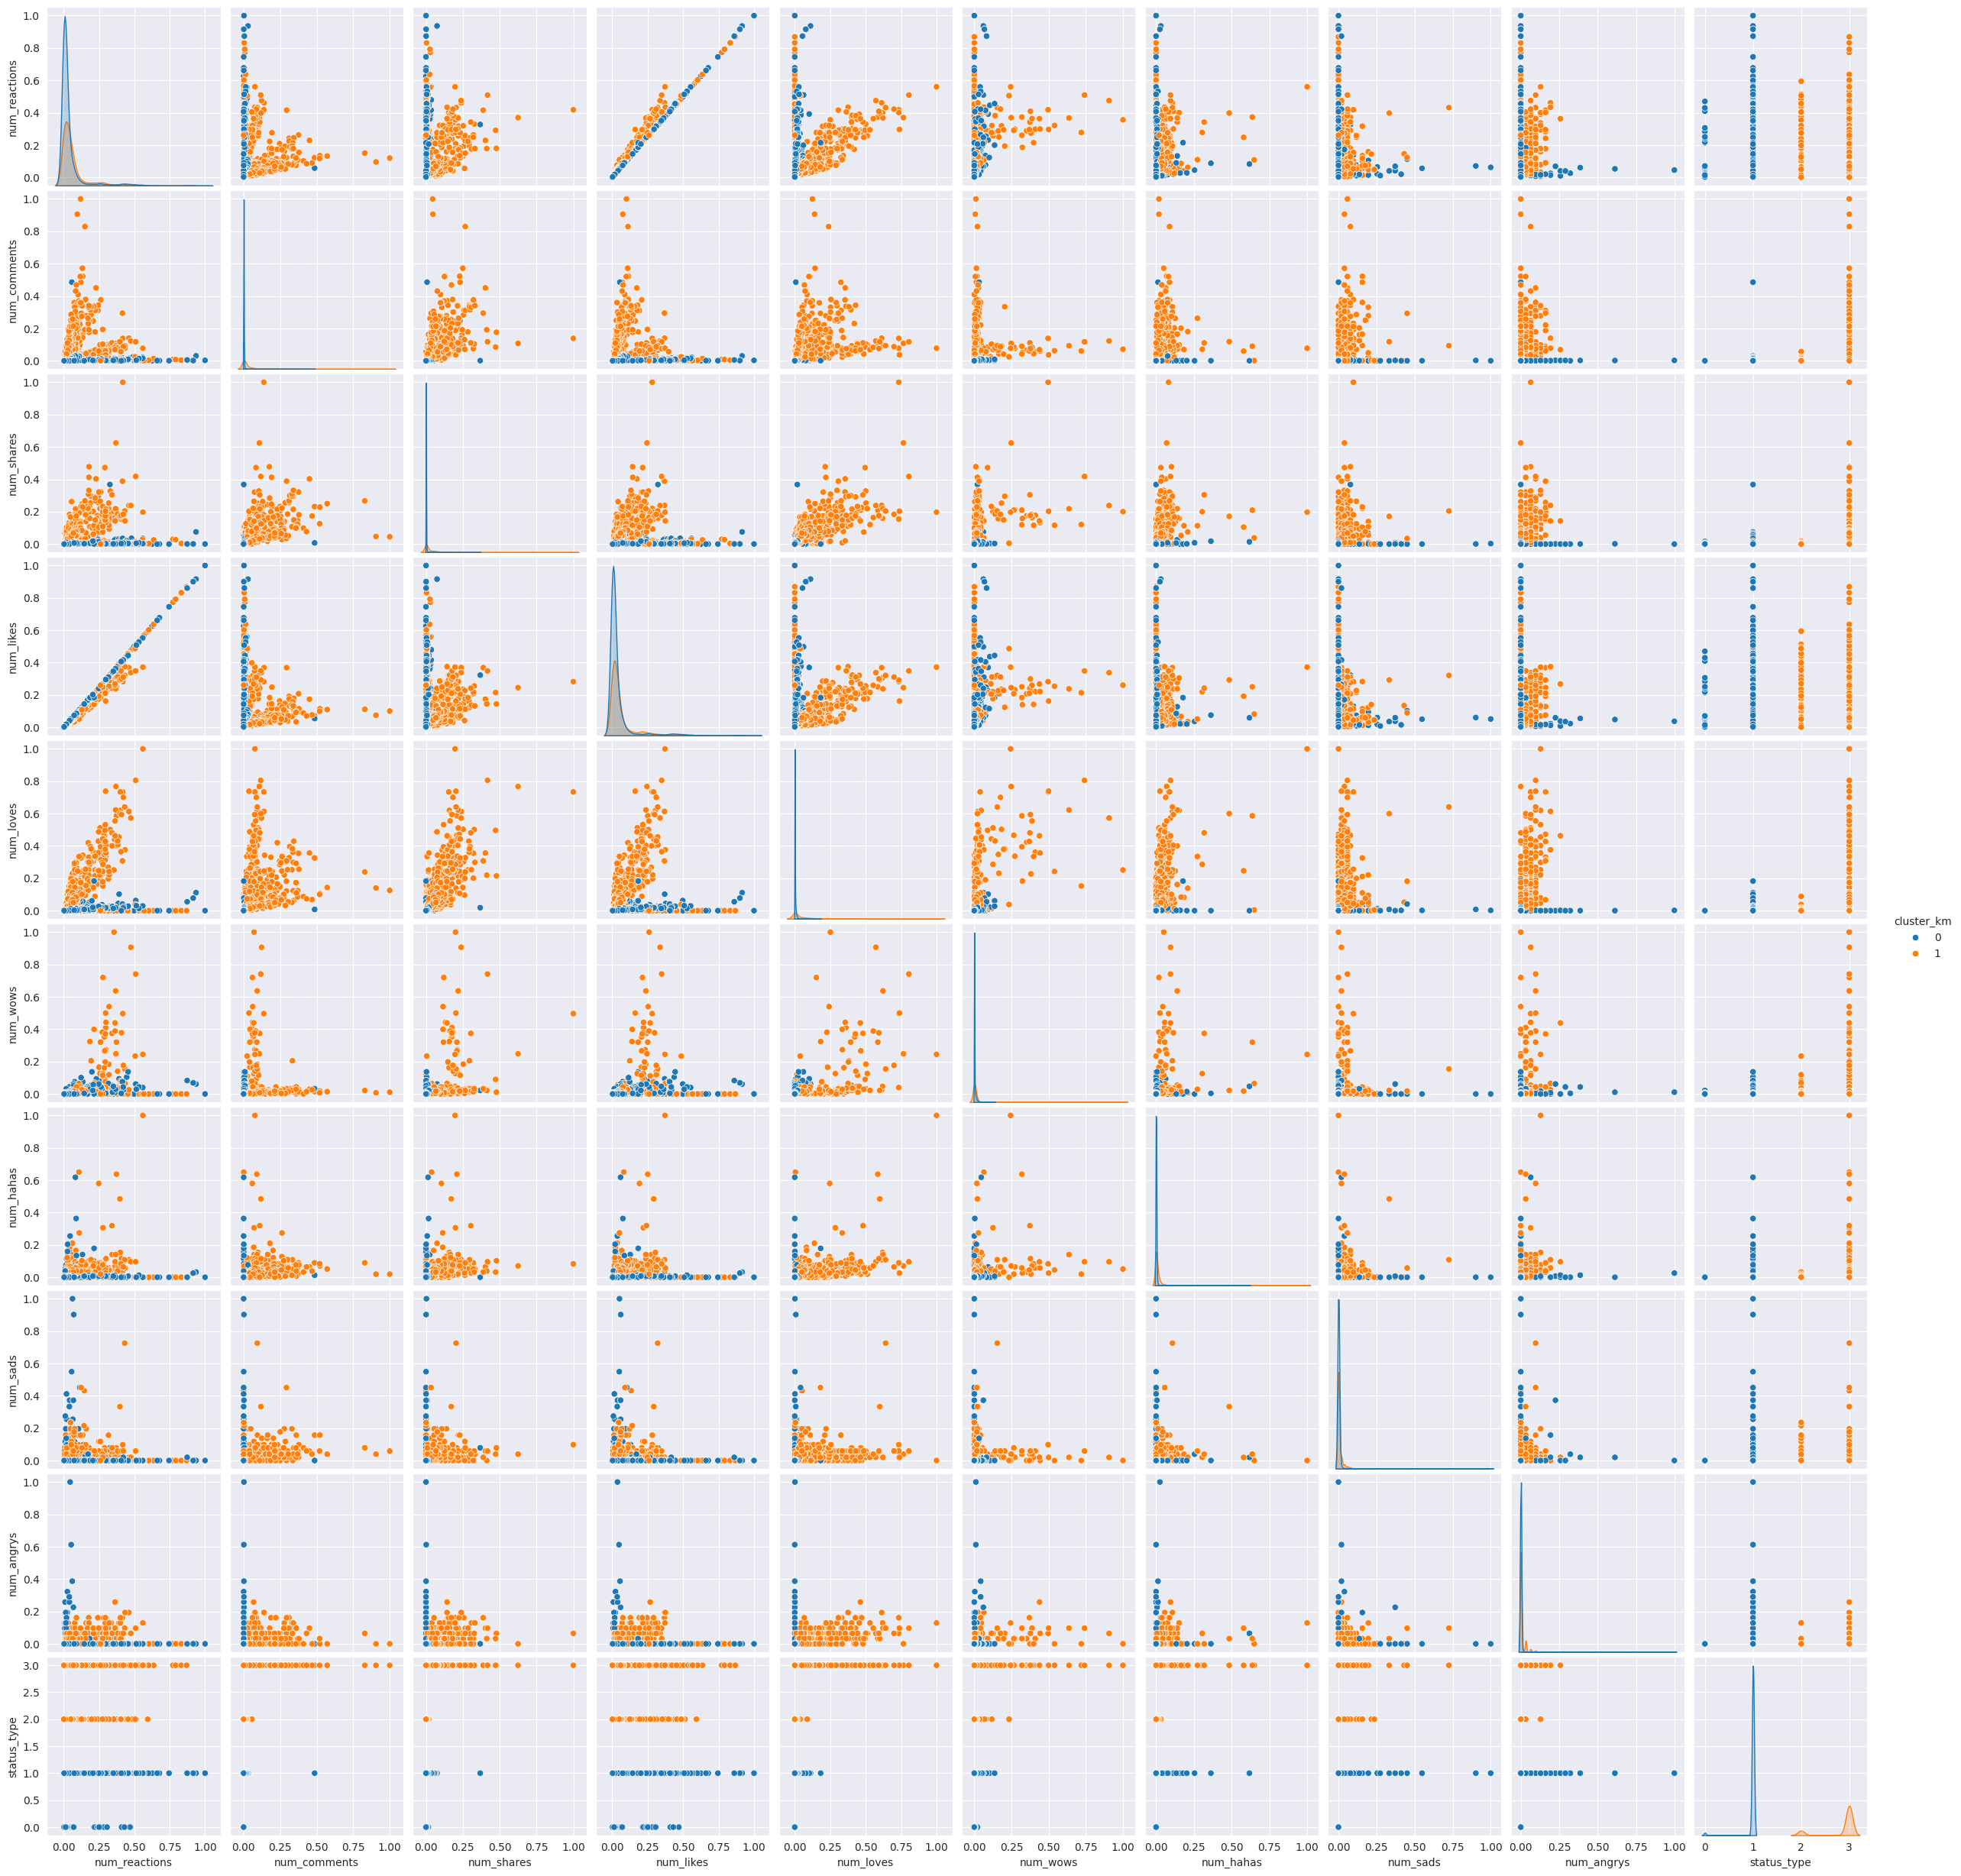

In [10]:
sns.pairplot(data = minmax_scaled_df, hue = 'cluster_km', palette='tab10')
plt.show()

### Scatter plot
1. Generate Colors Dynamically
HOW?
    1. Generate colormap by using colormaps['tab10']. other values : ['viridis'], ['rainbow']
    2. np.linspace(0,1,n_clusters) : generate n_cluster numbers in range 0-1. 
    3. color = cmap(np.linspace(0,1, n_clusters)) : map the colors in cmap to each number.
    4. assigned_colors = color[labels] : map colors to clusters
2. scatter plot note:
    * use c for color when you want to set a partcular color like 'black', 'red',...
    * use color, when you want all the points in a cluster to be the same color. 
    * assigned_colors output = color generated for each label. 
        * for example  [1.         0.49803922 0.05490196 1.        ] is a color for labels[0]


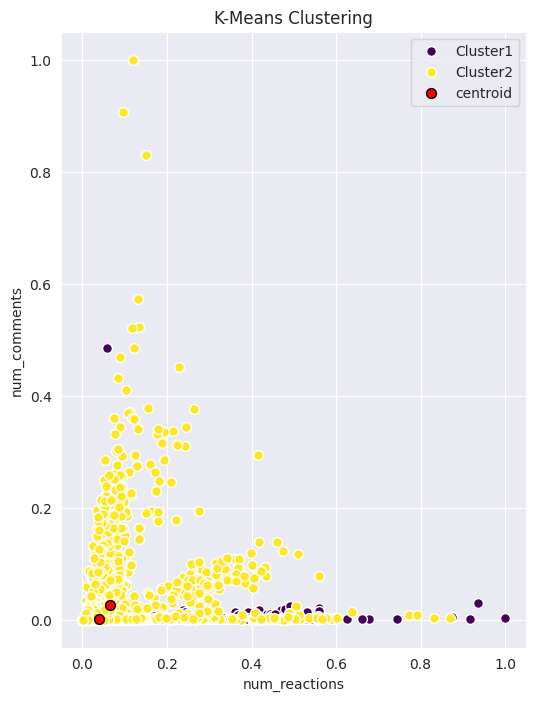

In [11]:
# Generate colormap
cmap = colormaps['viridis']

# Generate colors for each cluster, based on the number of clusters = n_clusters
color = cmap(np.linspace(0,1, n_clusters))

# Assigned colors to each datapoint's label
assigned_colors = color[labels]


# PLOT
plt.figure(figsize=(6,8))

# plot datapoints based on their color and cluster in 2D scatter plot for 2 features.
# Feature[:,0] = number of reactions
# Feature[:,1] = number of likes
for i in range(n_clusters):
    points = X[labels==i]
    plt.scatter(points[:,0], points[:,1], s=50, color=color[i], label = f'Cluster{i+1}', edgecolors='white')

# Plot centroid of each cluster with white color
plt.scatter(centroids[:,0], centroids[:,1], s=50, c = 'red', label = 'centroid', edgecolors='black')

# Add titles and labels
plt.title('K-Means Clustering')
plt.xlabel(f'{minmax_scaled_df.columns[0]}')
plt.ylabel(f'{minmax_scaled_df.columns[1]}')
plt.legend()
plt.grid(True)
plt.show()